In [26]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

#random seed dùng trong  np.random.seed(xxxxxx) là  6 chữ số cuối cùng trong mã số học viên cao học.
np.random.seed(101024)
rng = np.random.default_rng()
sns.set_theme(style='whitegrid')

In [27]:
# Phát sinh N = 15 thành phố.
n_cities = 15
cities = np.random.rand(n_cities, 2)

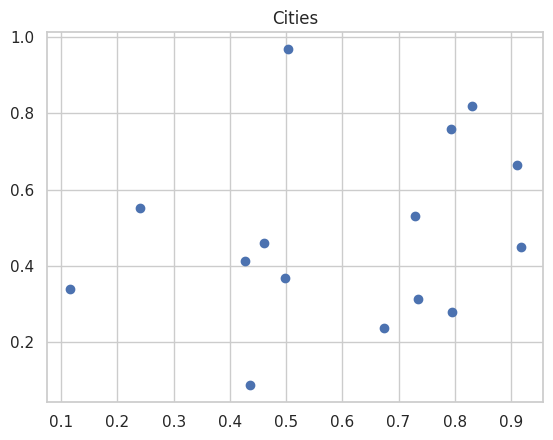

In [28]:
plt.scatter(cities[:, 0], cities[:, 1])
plt.title("Cities");

In [29]:
n = n_cities
print(f"O(n!): {math.factorial(n)}")
print(f"O(n^2 2^n): {n**2 * 2**n}")

O(n!): 1307674368000
O(n^2 2^n): 7372800


- WOW 1307674368000 is a big number. What will happend if there are 100 cities

In [30]:
order0 = rng.permutation(n_cities)
order1 = rng.permutation(n_cities)
print(order0)
print(order1)
ind = np.hstack((order0, order0[0]))
print(ind)

[ 4  8  2  5 10 13 14  1  0  9  7 12  6 11  3]
[14  0  9  5  8  3 12 13 10 11  7  2  1  4  6]
[ 4  8  2  5 10 13 14  1  0  9  7 12  6 11  3  4]


In [31]:
n_population = 256 
population = np.array([rng.permutation(n_cities) for i in range(n_population)])
population[:5]

array([[11,  3,  5, 13,  1,  0,  6,  4, 12,  2,  7,  8,  9, 10, 14],
       [ 5,  8, 12,  3,  2,  6,  9,  4, 14, 10,  1,  7, 11,  0, 13],
       [13,  0,  1,  3, 14, 12, 11,  4,  7,  6, 10,  8,  9,  5,  2],
       [12,  9, 13,  2,  0,  7,  3,  4,  6,  8, 14,  1, 11,  5, 10],
       [12,  7,  1,  2,  3,  5, 14,  9,  4, 11, 13,  6, 10,  0,  8]])

In [32]:
d = np.zeros((n_cities, n_cities))
for i in range(n_cities):
    for j in range(i):
        d[i, j] = np.sqrt((cities[i, 0] - cities[j, 0])**2 + (cities[i,1] - cities[j, 1])**2)
        d[j, i] = d[i, j]
d[:3, :3]

array([[0.        , 0.74692553, 0.60204662],
       [0.74692553, 0.        , 0.21568431],
       [0.60204662, 0.21568431, 0.        ]])

In [33]:
def total_distance(order, distances):
    t = 0
    for i in range(1, len(order)):
        t += distances[order[i-1], order[i]]
    t += distances[order[-1], order[0]]
    return t

In [34]:
print(order0)
print(order1)
print("order 0:", total_distance(order0, d))
print("order 1:", total_distance(order1, d))

[ 4  8  2  5 10 13 14  1  0  9  7 12  6 11  3]
[14  0  9  5  8  3 12 13 10 11  7  2  1  4  6]
order 0: 7.4682474100547696
order 1: 6.193421055243693


In [35]:
def evaluate(population, distances):
    fitness = np.zeros(len(population))
    for i in range(len(population)):
        fitness[i] = total_distance(population[i], distances)
    return fitness

In [36]:
fitness = evaluate(population, d)
for i in range(3):
    print(population[i], fitness[i])
print("Minimum: ")
print(population[np.argmin(fitness)], np.min(fitness), np.max(fitness))

[11  3  5 13  1  0  6  4 12  2  7  8  9 10 14] 7.42662541341204
[ 5  8 12  3  2  6  9  4 14 10  1  7 11  0 13] 7.832231264829165
[13  0  1  3 14 12 11  4  7  6 10  8  9  5  2] 6.291589168650369
Minimum: 
[11  5 14  6 12  0 13  1 10  2  9  7  3  4  8] 5.178455480191191 7.957816038590059


# TSP with GA POPOP 

In [37]:
#random seed dùng trong  np.random.seed(xxxxxx) là  6 chữ số cuối cùng trong mã số học viên cao học. 
np.random.seed(101024) # 220101024
rng = np.random.default_rng()

In [38]:
def plot_helper(label, color, fits, evals):
    avg = np.mean(fits, axis=0)
    err = np.std(fits, axis=0) 
    plt.plot(evals, avg, label=label, color=color)
    plt.fill_between(evals, avg+err, avg-err, facecolor=color, alpha=0.1)

In [39]:
def tsp(order):
    return total_distance(order, d)


In [40]:
n_cities = 15
n_population = 4 * 10
max_evaluations = 100
n_trials = 10

In [41]:
def initialize_population( n_cities, n_population):
    population = np.array([rng.permutation(n_cities) for i in range(n_population)])
    return population

## Selection

In [42]:
def tournament_selection(population, fitness, selection_size, t_size=4):
    selected_indices = []

    for _ in range(selection_size):
        # Chọn ngẫu nhiên tournament_size cá thể vào bảng đấu
        tournament_indices = np.random.choice(len(population), size=t_size, replace=False)

        # Tìm cá thể có fitness tốt nhất trong bảng đấu
        best_index = tournament_indices[np.argmin(fitness[tournament_indices])]

        # Thêm chỉ mục của cá thể chiến thắng vào danh sách được chọn
        selected_indices.append(best_index)
    return selected_indices

## Mutations

In [43]:
from pymoo.operators.mutation import inversion

def mutateInversion(ind):
    return inversion.inversion_mutation(ind, None)
    # return PolynomialMutation.
test_order = rng.permutation(n_cities)
print(test_order)
test_order_mutated = mutateInversion(test_order)
test_order_mutated

[11  2  6 13  4 12 14  7  3 10  0  1  9  5  8]


array([11,  6,  2, 13,  4, 12, 14,  7,  3, 10,  0,  1,  9,  5,  8])

In [44]:
def mutateUniform(ind):
    rng = np.random.default_rng()
    x = rng.choice(len(ind)-1)
    child = np.copy(ind)
    child[x] = ind[x+1]
    child[x+1] = ind[x]
    return child

test_order = rng.permutation(n_cities)
print(test_order)
test_order_mutated = mutateUniform(test_order)
test_order_mutated

[11  5  8  3 12  0  6 14  2  4 10  1  9  7 13]


array([11,  5,  8,  3, 12,  0,  6,  2, 14,  4, 10,  1,  9,  7, 13])

# Crossover

In [45]:
from pymoo.operators.crossover import erx
def crossoverErx(pop):
    num_individuals = len(pop)
    offspring = []
    for i in range(0, num_individuals, 2):
        p1 = pop[i]
        p2 = pop[i+1]
         # Tạo cá thể con thứ nhất bằng cách kết hợp gen của cha và mẹ
        offspring1 = erx.erx(p1, p2)
        # Tạo cá thể con thứ hai bằng cách kết hợp gen của mẹ và cha
        offspring2 = erx.erx(p1, p2)
        offspring.append(offspring1)
        offspring.append(offspring2)
    offspring = np.array(offspring)
    return offspring

test_order_1 = rng.permutation(n_cities)
test_order_2 = rng.permutation(n_cities)
print(test_order_1)
print(test_order_2)
test_off_spring = crossoverErx([test_order_1, test_order_2])
test_off_spring


[ 4 10 12  0  6  7  5 13 11  2  9  1  3  8 14]
[ 5  4  3  2  1  8 12 10 11 13  9  7  6 14  0]


array([[12, 10, 11, 13,  5,  0,  6,  7,  9,  2,  1,  3,  4, 14,  8],
       [ 9,  7,  6, 14,  0, 12, 10, 11, 13,  5,  4,  3,  8,  1,  2]])

In [46]:
from pymoo.operators.crossover import ox
def crossoverOx(pop):
    num_individuals = len(pop)
    offspring = []
    for i in range(0, num_individuals, 2):
        p1 = pop[i]
        p2 = pop[i+1]
        start, end = np.sort(np.random.choice(n, 2, replace=False))
        seq = tuple([start, end])
         # Tạo cá thể con thứ nhất bằng cách kết hợp gen của cha và mẹ
        offspring1 = ox.ox(p1, p2, seq)
        # Tạo cá thể con thứ hai bằng cách kết hợp gen của mẹ và cha
        offspring2 = ox.ox(p2, p1, seq)
        offspring.append(offspring1)
        offspring.append(offspring2)
    offspring = np.array(offspring)
    return offspring

test_order_1 = rng.permutation(n_cities)
test_order_2 = rng.permutation(n_cities)
print(test_order_1)
print(test_order_2)
test_off_spring = crossoverOx([test_order_1, test_order_2])
test_off_spring

[11  8  4  1 14  7  0  5 12 10  6  3  9  2 13]
[ 4 12  9 11  2  1 14  8  5 13 10  7  0  3  6]


array([[11,  4,  1, 12,  6,  3, 14,  8,  5, 13, 10,  7,  0,  9,  2],
       [ 4, 11,  2,  1, 14,  8,  0,  5, 12, 10,  6,  3,  9, 13,  7]])

In [47]:
def genetic_algorithm_POPOP(
        objective,
        transform_fn, 
        n_cities, 
        n_population,
        max_evaluations, 
    verbose=False):
    pop = initialize_population(n_cities, n_population)
    pop_fitness = np.array([objective(ind) for ind in pop], dtype=float)
    best_fitness = []
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)

    for i in range(max_evaluations):
        
        best_fitness.append([i, pop_fitness.min()])
        # lai ghép để tạo cá thể con mới từ quần thể hiện tại 
        offspring = transform_fn(pop)
        offspring_fitness = np.array([objective(ind) for ind in offspring])


        # trộn cha mẹ và con cái (P+O)
        pop = np.vstack([pop, offspring])
        pop_fitness = np.concatenate((pop_fitness, offspring_fitness))

        # chọn lọc giao đấu 
        selected_indices = tournament_selection(pop, pop_fitness, n_population)
        pop = pop[selected_indices]
        pop_fitness = pop_fitness[selected_indices]

        if verbose:
            print(f'#Gen {i+1}:')
            # print(selected_indices)
            # print(len(pop))
            # print(len(pop_fitness))

    best_fitness.append([i, pop_fitness[np.argmin(pop_fitness)]])
    if verbose:
        print('#Final result:')
        print(best_fitness)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)




## tranforms

In [48]:
def transform1(pop):
    offspring = mutateInversion(pop)
    return offspring

def transform2(pop):
    offspring = crossoverOx(pop)
    return offspring

def transform3(pop):
    offspring = mutateUniform(pop)
    return offspring

def transform4(pop):
    offspring = crossoverErx(pop)
    return offspring

def transform5(pop):
    offspring = mutateInversion(pop)
    offspring = crossoverOx(offspring)
    return offspring

def transform6(pop):
    offspring = mutateInversion(pop)
    offspring = crossoverErx(offspring)
    return offspring 

In [49]:
def run(transform_fn):
    fits = []
    evals= []
    for i in range(n_trials):
        pop, pop_fitness, best_fitness = genetic_algorithm_POPOP(
            tsp, 
            transform_fn, 
            n_cities, 
            n_population, 
            max_evaluations,
        )
        best_fitness = np.array(best_fitness)
        if i == 0:
            evals = best_fitness[:,0]
        fits.append(best_fitness[:,1])

    return fits, evals

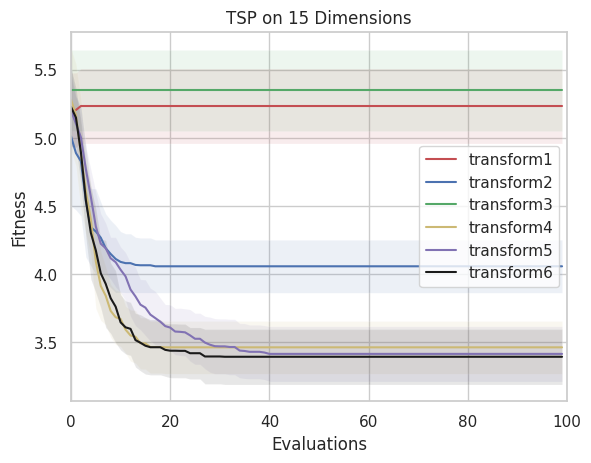

In [50]:

fits_1, evals_1 = run(transform1)
fits_2, evals_2 = run(transform2)
fits_3, evals_3 = run(transform3)
fits_4, evals_4 = run(transform4)
fits_5, evals_5 = run(transform5)
fits_6, evals_6 = run(transform6)


plot_helper("transform1", "r", fits_1, evals_1)
plot_helper("transform2", "b", fits_2, evals_2)
plot_helper("transform3", "g", fits_3, evals_3)
plot_helper("transform4", "y", fits_4, evals_4)
plot_helper("transform5", "m", fits_5, evals_5)
plot_helper("transform6", "k", fits_6, evals_6)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations)
plt.title(f"TSP on {n_cities} Dimensions")
plt.legend();


## Questions:
Ít nhất 2 phép lại ghép (crossover) cho TSP. Thông qua thực nghiệm thì phép lai ghép nào cho kết quả tốt hơn?  
Ít nhất 2 phép đột biến (mutation) cho TSP. Thông qua thực nghiệm thì phép đột biến nào cho kết quả tốt hơn? Xác suất đột biến các bạn có thể tự tinh chỉnh sao cho hợp lý.  
Thông qua thực nghiệm các bạn hãy cho biết nên thiết kế phép biến đổi thế nào? Lai ghép + đột biến, hay chỉ có lai ghép, hay chỉ có đột biến?  

Dựa vào kết quả chạy thì chúng ta có thể trả lời:
- crossoverErx tốt hơn crossoverOx
- mutateInversion cho kết quả tốt hơn mutateUniform
- Nên thiết kế lai ghép + đột biến để đạt kết quả tốt nhất (transform 66
